In [2]:
!pip install swig
!pip install gymnasium[all]

  Using cached swig-4.2.1.post0-py2.py3-none-manylinux_2_5_x86_64.manylinux1_x86_64.whl.metadata (3.5 kB)
Using cached swig-4.2.1.post0-py2.py3-none-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.8 MB)
  Using cached gymnasium-1.0.0-py3-none-any.whl.metadata (9.5 kB)
  Using cached Farama_Notifications-0.0.4-py3-none-any.whl.metadata (558 bytes)
  Using cached ale_py-0.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.6 kB)
  Using cached box2d-py-2.3.5.tar.gz (374 kB)
  Preparing metadata (setup.py) ... done
  Using cached mujoco_py-2.1.2.14-py3-none-any.whl.metadata (669 bytes)
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl.metadata (3.1 kB)
  Using cached mujoco-3.2.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (44 kB)
  Using cached glfw-2.7.0-py2.py27.py3.py30.py31.py32.py33.py34.py35.py36.py37.py38-none-manylinux2014_x86_64.whl.metadata (5.4 kB)
  Using cached fastener

# Create Environment by hand

In [95]:
from importlib import reload
reload(cliff_walk)
reload(main)

<module 'main' from '/content/main.py'>

In [100]:
import cliff_walk as c
from IPython.display import clear_output

In [122]:
cw = c.CliffWalk()
cw.print_board()
while True:
    print()
    action = c.Action(int(input()))
    print(action)
    cw.walk(action)
    clear_output()
    print(cw.terminated)
    if (cw.terminated):
      cw.reset()
    cw.print_board()

False
[ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ]
[ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ]
[ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ]
[*] [#] [#] [#] [#] [#] [#] [#] [#] [#] [#] [$]
0: Move up | 1: Move right | 2: Move down | 3: Move left



KeyboardInterrupt: Interrupted by user

# Reinforcement Learning - Temporal Difference

In [88]:
import main as m
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Temporal difference

- Policy: Greedy
- n: 0
- gamma: .2
- steps: 1e5

Algorithm<TEMPORAL DIFFERENCE>(n=0 alpha=0.1 gamma=0.2 seed=None policy_type=Policy.GREEDY)


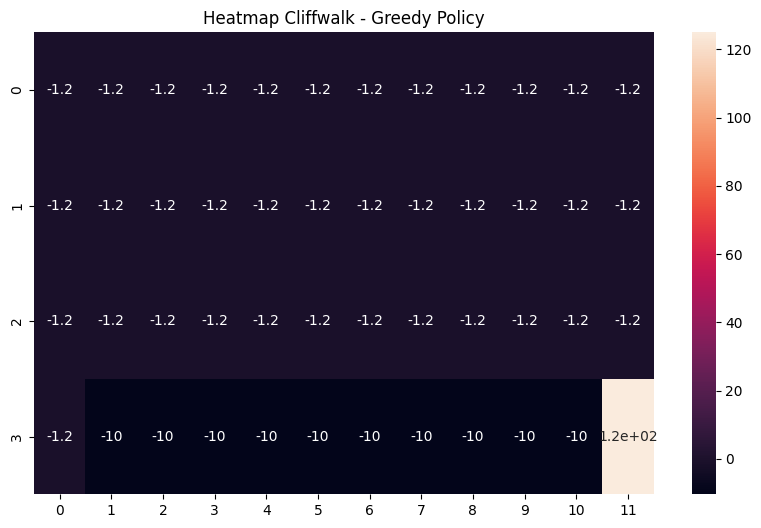

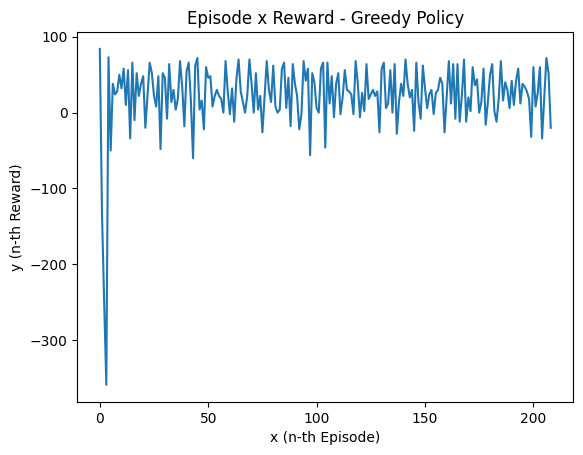

In [89]:
env = m.get_env()

alg = m.Algorithm.TD.init(n=0, gamma=0.2, p_type=m.Policy.GREEDY)
print(alg)
step_reward_list = []
reward_list = []
alg.run(
    n_steps=1e5,
    on_step_end=m.track_episode_reward,
    on_step_end_args=[step_reward_list, m.Environ.STATE, reward_list],
)

plt.figure(figsize=(10, 6))
sns.heatmap(np.reshape(np.array(alg.v_table), (4, 12)), annot=True, cbar=True)

plt.title("Heatmap Cliffwalk - Greedy Policy")

plt.show()

plt.plot(list(range(len(reward_list))), reward_list)

plt.title("Episode x Reward - Greedy Policy")
plt.xlabel("x (n-th Episode)")
plt.ylabel("y (n-th Reward)")

plt.show()

Temporal difference

- Policy: Softmax
- n: 0
- gamma: .2
- steps: 1e5

Algorithm<TEMPORAL DIFFERENCE>(n=0 alpha=0.1 gamma=0.2 seed=None policy_type=Policy.SOFTMAX)


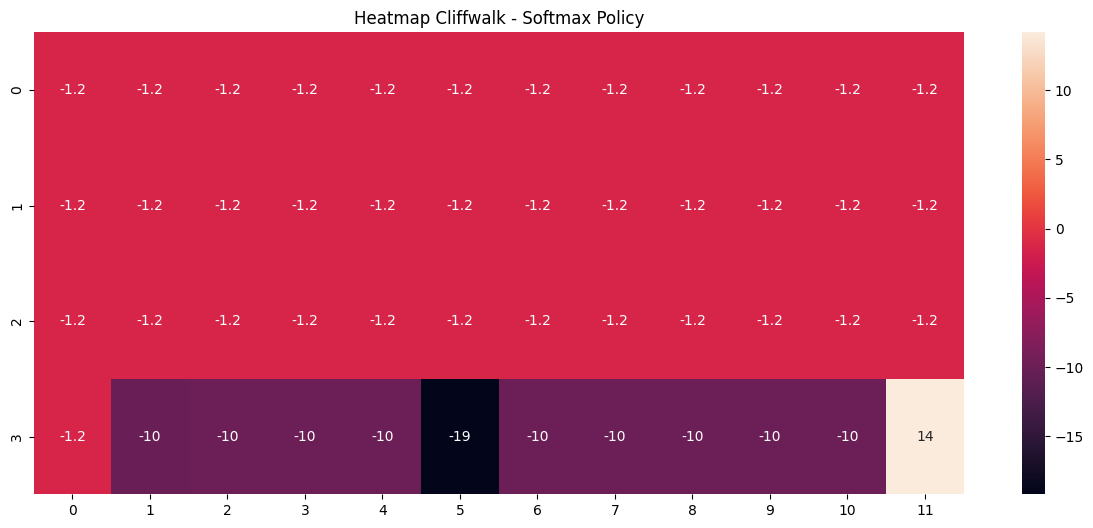

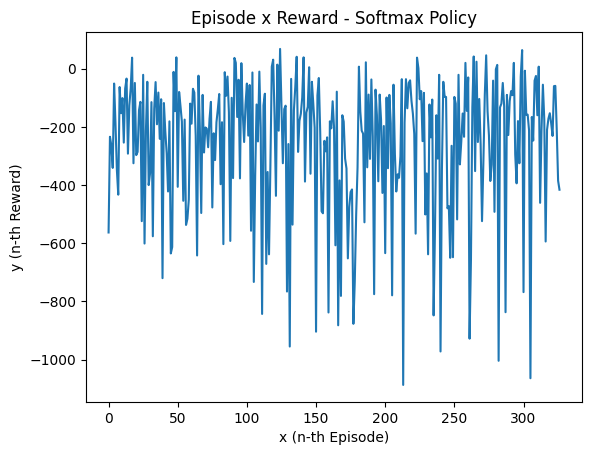

In [90]:
env = m.get_env()

alg = m.Algorithm.TD.init(n=0, gamma=0.2, p_type=m.Policy.SOFTMAX)
print(alg)
step_reward_list = []
reward_list = []
alg.run(
    n_steps=1e5,
    on_step_end=m.track_episode_reward,
    on_step_end_args=[step_reward_list, m.Environ.STATE, reward_list],
)

plt.figure(figsize=(15, 6))
sns.heatmap(np.reshape(np.array(alg.v_table), (4, 12)), annot=True, cbar=True)

plt.title("Heatmap Cliffwalk - Softmax Policy")

plt.show()

plt.plot(list(range(len(reward_list))), reward_list)

plt.title("Episode x Reward - Softmax Policy")
plt.xlabel("x (n-th Episode)")
plt.ylabel("y (n-th Reward)")

plt.show()

Temporal difference

- Policy: Epsilon Greedy
- n: 0
- gamma: .2
- steps: 1e5
- epsilon: 0.2

Algorithm<TEMPORAL DIFFERENCE>(n=0 alpha=0.1 gamma=0.2 seed=None policy_type=Policy.EPS_GREEDY)


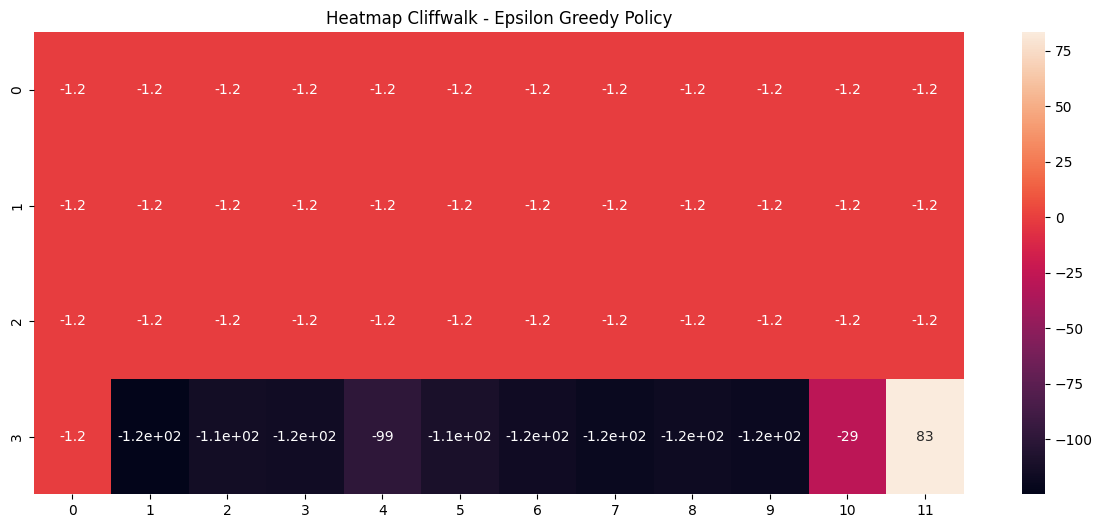

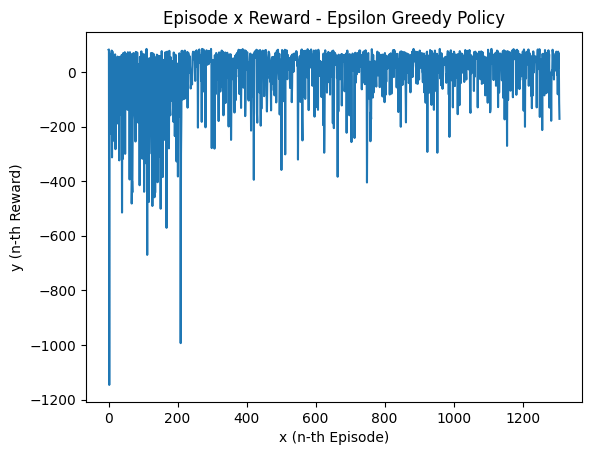

In [91]:
env = m.get_env()

alg = m.Algorithm.TD.init(n=0, gamma=0.2, p_type=m.Policy.EPS_GREEDY.init(epsilon=.2))
print(alg)
step_reward_list = []
reward_list = []
alg.run(
    n_steps=1e5,
    on_step_end=m.track_episode_reward,
    on_step_end_args=[step_reward_list, m.Environ.STATE, reward_list],
)

plt.figure(figsize=(15, 6))
sns.heatmap(np.reshape(np.array(alg.v_table), (4, 12)), annot=True, cbar=True)

plt.title("Heatmap Cliffwalk - Epsilon Greedy Policy")

plt.show()

plt.plot(list(range(len(reward_list))), reward_list)

plt.title("Episode x Reward - Epsilon Greedy Policy")
plt.xlabel("x (n-th Episode)")
plt.ylabel("y (n-th Reward)")

plt.show()

Temporal difference

- Policy: Greedy
- n: 10
- gamma: .2
- steps: 1e5

Algorithm<TEMPORAL DIFFERENCE>(n=10 alpha=0.1 gamma=0.2 seed=None policy_type=Policy.GREEDY)


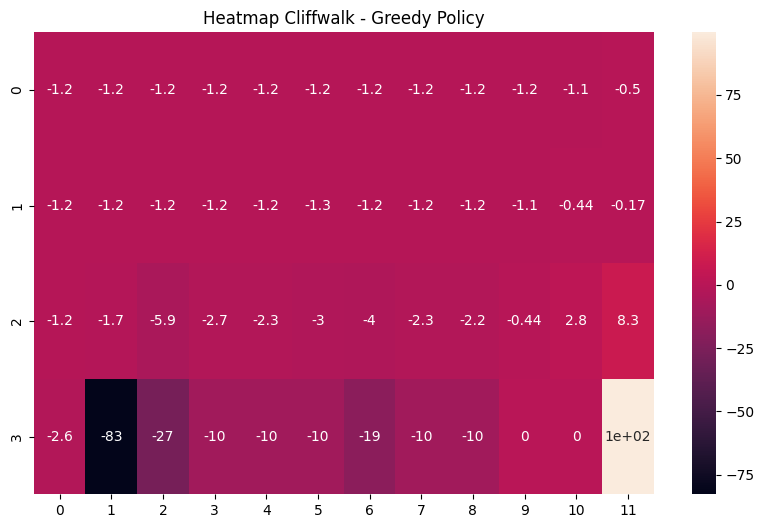

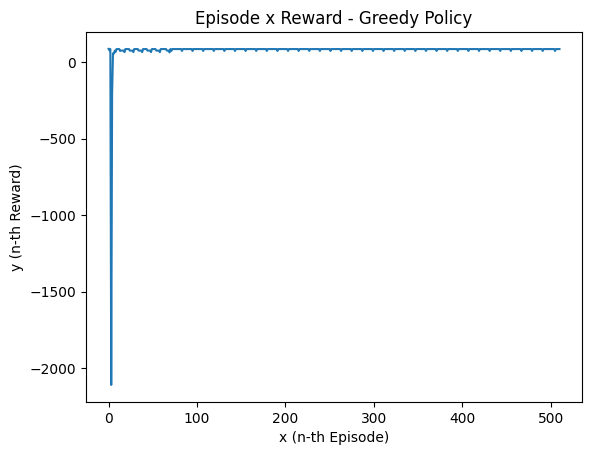

In [92]:
env = m.get_env()

alg = m.Algorithm.TD.init(n=10, gamma=0.2, p_type=m.Policy.GREEDY)
print(alg)
step_reward_list = []
reward_list = []
alg.run(
    n_steps=1e4,
    on_step_end=m.track_episode_reward,
    on_step_end_args=[step_reward_list, m.Environ.STATE, reward_list],
)

plt.figure(figsize=(10, 6))
sns.heatmap(np.reshape(np.array(alg.v_table), (4, 12)), annot=True, cbar=True)

plt.title("Heatmap Cliffwalk - Greedy Policy")

plt.show()

plt.plot(list(range(len(reward_list))), reward_list)

plt.title("Episode x Reward - Greedy Policy")
plt.xlabel("x (n-th Episode)")
plt.ylabel("y (n-th Reward)")

plt.show()

Temporal difference

- Policy: Softmax
- n: 10
- gamma: .2
- steps: 1e4

Algorithm<TEMPORAL DIFFERENCE>(n=10 alpha=0.1 gamma=0.2 seed=None)policy_type=Policy.SOFTMAX)


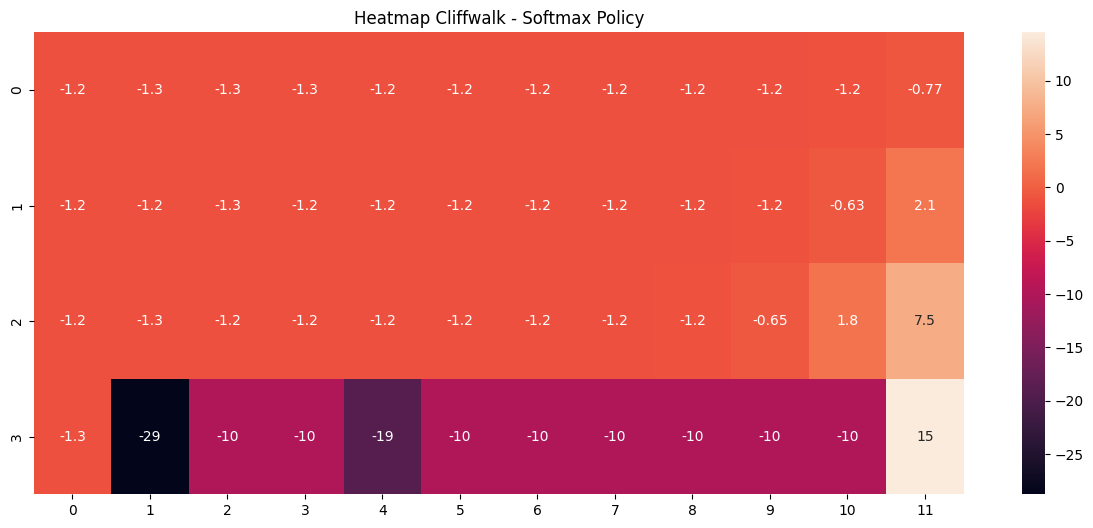

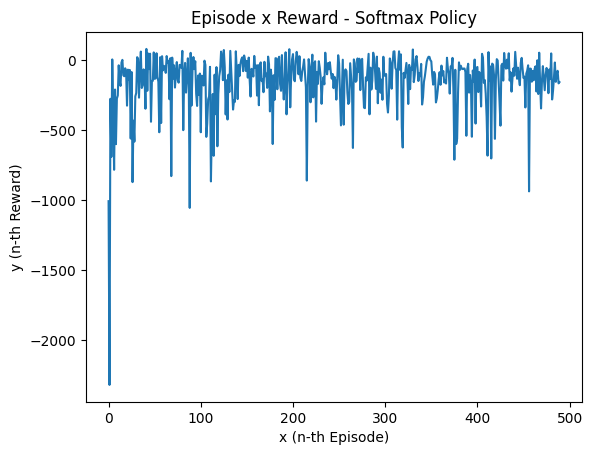

In [84]:
env = m.get_env()

alg = m.Algorithm.TD.init(n=10, gamma=0.2, p_type=m.Policy.SOFTMAX)
print(alg)
step_reward_list = []
reward_list = []
alg.run(
    n_steps=1e5,
    on_step_end=m.track_episode_reward,
    on_step_end_args=[step_reward_list, m.Environ.STATE, reward_list],
)

plt.figure(figsize=(15, 6))
sns.heatmap(np.reshape(np.array(alg.v_table), (4, 12)), annot=True, cbar=True)

plt.title("Heatmap Cliffwalk - Softmax Policy")

plt.show()

plt.plot(list(range(len(reward_list))), reward_list)

plt.title("Episode x Reward - Softmax Policy")
plt.xlabel("x (n-th Episode)")
plt.ylabel("y (n-th Reward)")

plt.show()

Temporal difference

- Policy: Epsilon Greedy
- n: 10
- gamma: .2
- steps: 1e5
- epsilon: 0.2

Algorithm<TEMPORAL DIFFERENCE>(n=0 alpha=0.1 gamma=0.2 seed=None)policy_type=Policy.EPS_GREEDY)


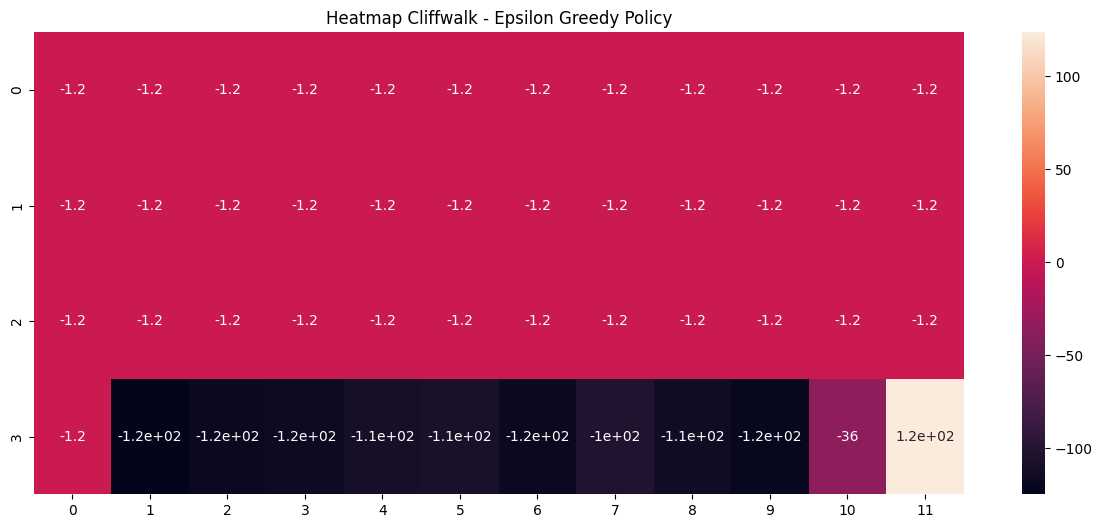

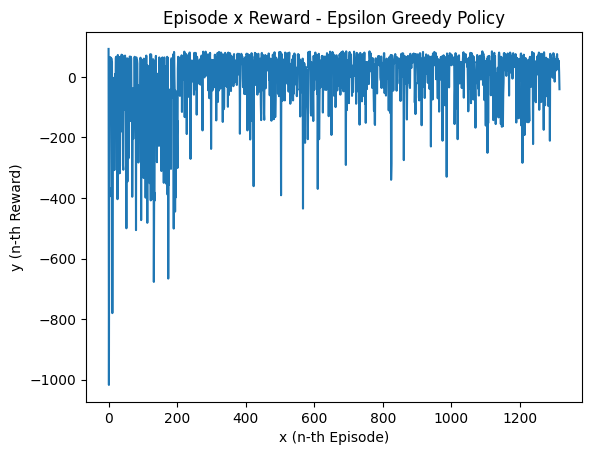

In [85]:
env = m.get_env()

alg = m.Algorithm.TD.init(n=0, gamma=0.2, p_type=m.Policy.EPS_GREEDY.init(epsilon=.2))
print(alg)
step_reward_list = []
reward_list = []
alg.run(
    n_steps=1e5,
    on_step_end=m.track_episode_reward,
    on_step_end_args=[step_reward_list, m.Environ.STATE, reward_list],
)

plt.figure(figsize=(15, 6))
sns.heatmap(np.reshape(np.array(alg.v_table), (4, 12)), annot=True, cbar=True)

plt.title("Heatmap Cliffwalk - Epsilon Greedy Policy")

plt.show()

plt.plot(list(range(len(reward_list))), reward_list)

plt.title("Episode x Reward - Epsilon Greedy Policy")
plt.xlabel("x (n-th Episode)")
plt.ylabel("y (n-th Reward)")

plt.show()